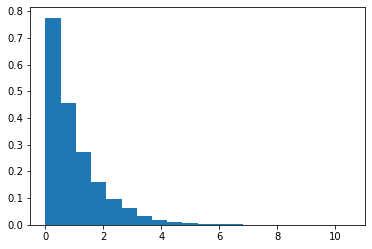

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as mnorm
from scipy.stats import norm, t, expon

n = 10000

# Симулируем выборку из многомерного нормального
# стандартизирвав ковариационную матрицу
sigma = np.array([[1, 0.3, -0.2],
                  [0.3, 1, 0.25],
                  [-0.2, 0.25, 1]])
u = mnorm.rvs(mean=[0, 0, 0], cov=sigma, size=n)
x = norm.cdf(u)

# Задаем маржинальные распределения каждой компоненте
x_copula = x.copy()
x_copula[:, 0] = expon.ppf(x[:, 0]) # экспоненциальное
x_copula[:, 1] = t.ppf(x[:, 1], df=5) # Стьюдент
x_copula[:, 2] = t.ppf(x[:, 2], df=5) * np.sqrt((5 - 2) / 5) # стандартизированный Стьюдент

# Убеждаемся в верной форме маржинального распределения
# за счет графического анализа
plt.hist(x_copula[:, 0], density=True, bins=20);